In [14]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [15]:
sales_df= pd.read_csv('advertising_and_sales_clean.csv')
sales_df

,tv,radio,social_media,influencer,sales
0,16000.0,6566.23,2907.98,Mega,54732.76
1,13000.0,9237.76,2409.57,Mega,46677.90
2,41000.0,15886.45,2913.41,Mega,150177.83
3,83000.0,30020.03,6922.30,Mega,298246.34
4,15000.0,8437.41,1406.00,Micro,56594.18
...,...,...,...,...,...
4541,26000.0,4472.36,717.09,Micro,94685.87
4542,71000.0,20610.69,6545.57,Nano,249101.92
4543,44000.0,19800.07,5096.19,Micro,163631.46
4544,71000.0,17534.64,1940.87,Macro,253610.41


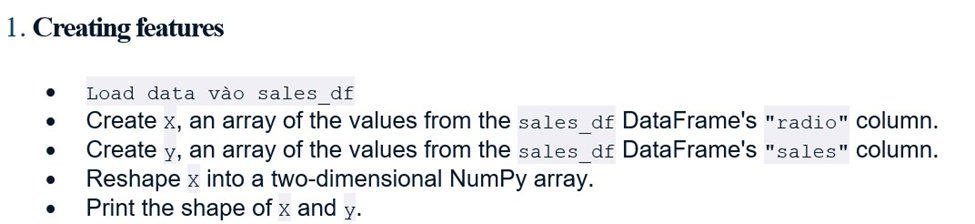

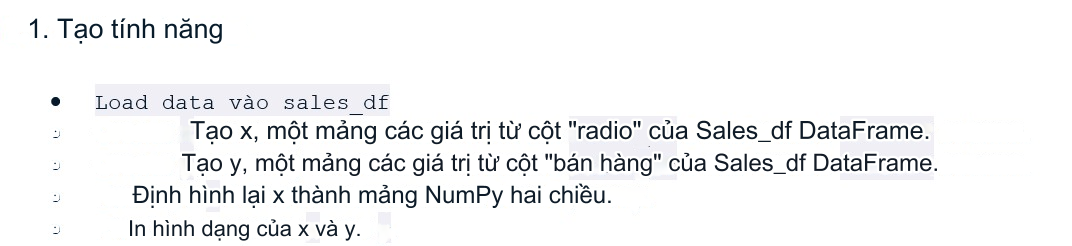

In [16]:
# Tạo mảng x, giá trị cột radio
x = sales_df['radio'].values
y = sales_df['sales'].values

# Mảng 2 chiều x

x = x.reshape(-1,1)
print("Mang x", x)
print("Mang y", y)

print("In hình dạng cua x", x.shape)
print("In hình dạng cua y", y.shape)


Mang x [[ 6566.23]
 [ 9237.76]
 [15886.45]
 ...
 [19800.07]
 [17534.64]
 [15966.69]]
Mang y [ 54732.76  46677.9  150177.83 ... 163631.46 253610.41 148202.41]
In hình dạng cua x (4546, 1)
In hình dạng cua y (4546,)


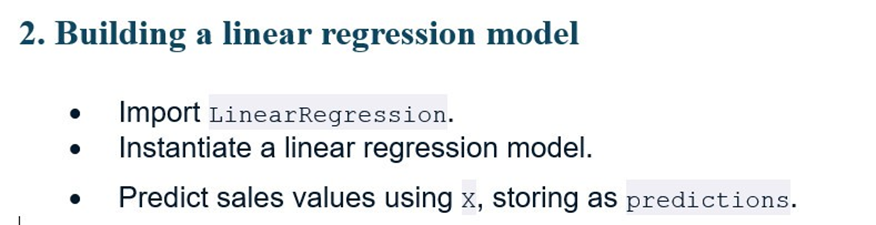

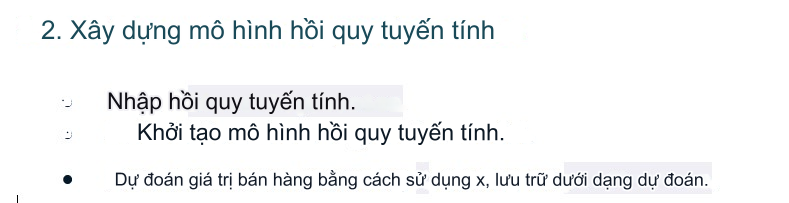

In [17]:
from sklearn.linear_model import LinearRegression
model = LinearRegression() # Create a new linear regression model
model.fit(x, y) # Fit the model to the data
# Predict sales values using x, storing as predictions.


LinearRegression()

In [18]:
predictions = model.predict(x) # Make predictions using the model
print(predictions)

[ 95491.17119147 117829.51038393 173423.38071499 ... 206147.61403088
 187204.93183873 174094.31771993]


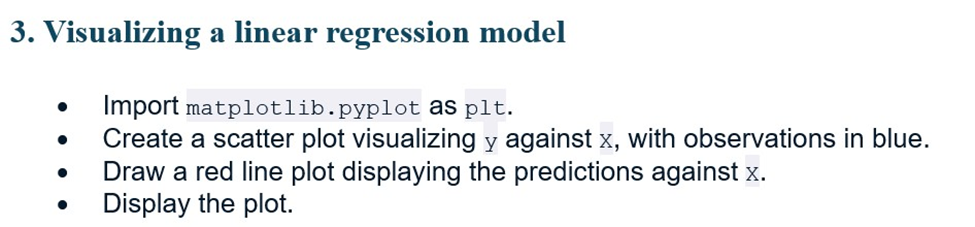

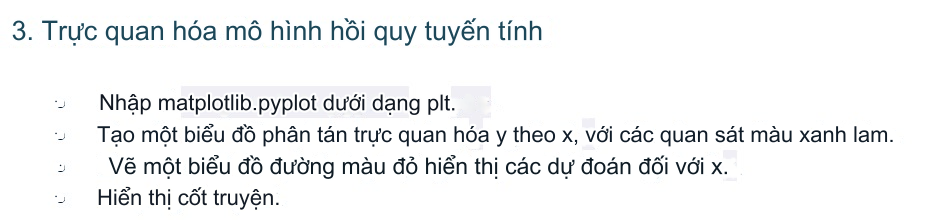

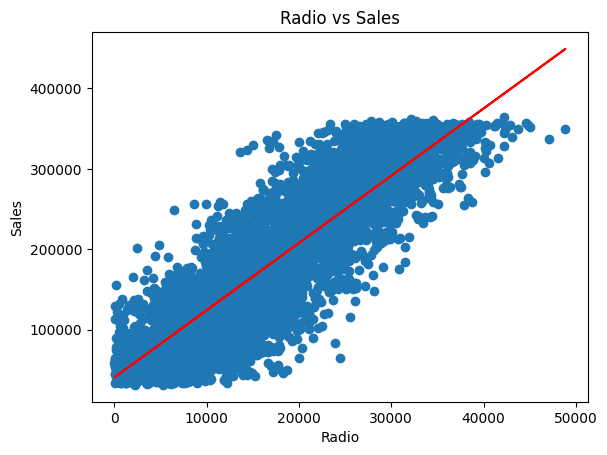

In [19]:
plt.scatter (x,y)
plt.plot(x, predictions, color='red')
plt.xlabel ("Radio")
plt.ylabel ("Sales")
plt.title ("Radio vs Sales")
plt.show()


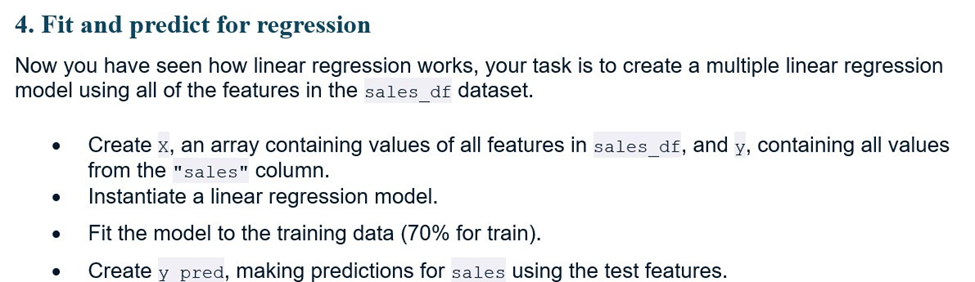

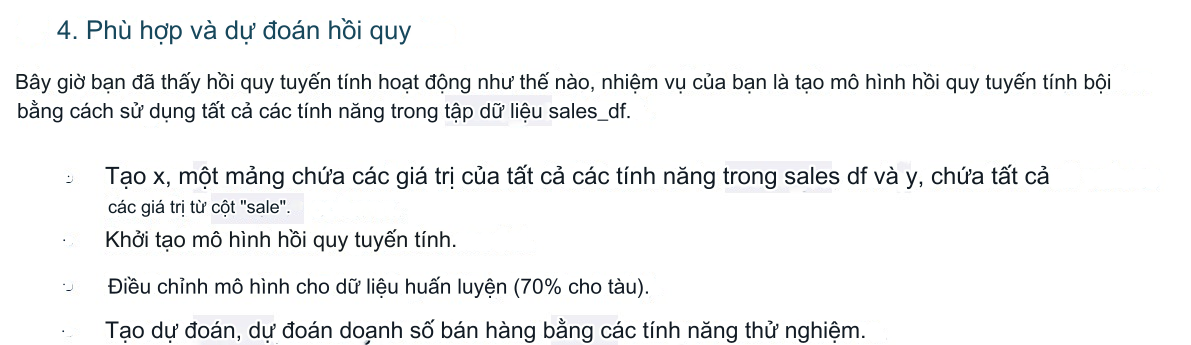

In [20]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [21]:
# Tao x 
x = sales_df
#Tạo y chua gia tri cua sales và y
y = sales_df['sales'].values

In [22]:
#  chia du lieu thanh 2 phan train va test
x=sales_df.drop(['sales','influencer'], axis=1).values
y=sales_df['sales'].values
# KFold: Lớp chia dữ liệu thành các tập huấn luyện và tập kiểm tra theo phương pháp K-Fold
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=40)
#khoi tao mo hinh tuyen tinh
model = LinearRegression()
model.fit(x_train, y_train)
# Huấn luyện mô hình hồi quy tuyến tính trên tập huấn luyện
predictions = model.predict(x_test) 
y_pred = model.predict(x_test)
print(y_pred)

[ 63939.92329642 206424.98569149 320383.11699919 ... 302549.89554862
 324002.17654159 185003.08598385]


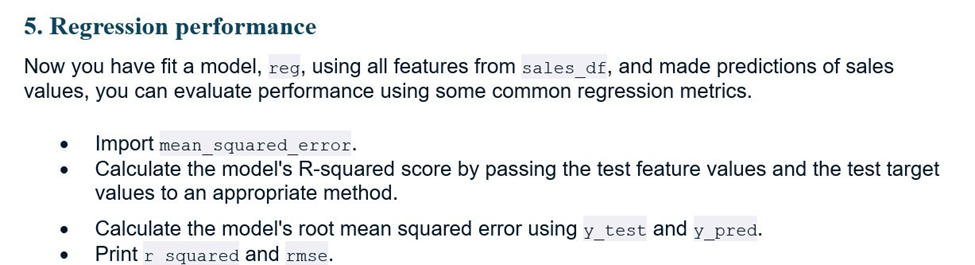

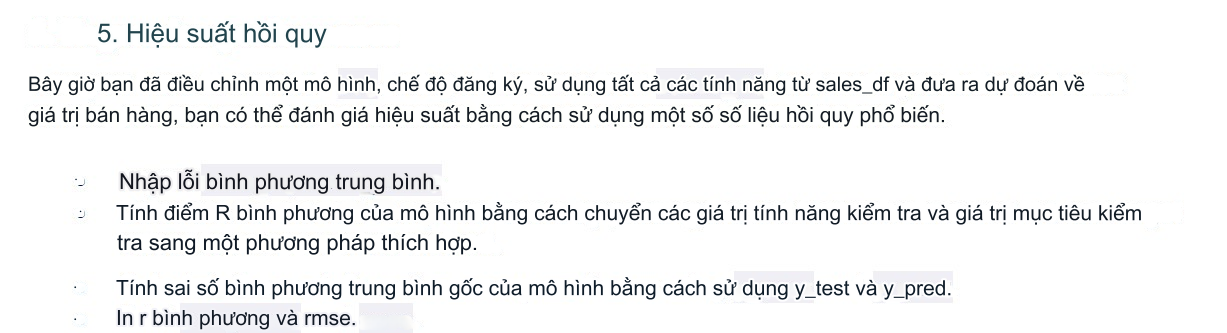

In [23]:
from sklearn.metrics import mean_squared_error


In [24]:
# Nhập lỗi bình phương trung bình mean squared error
r_squared = model.score(x_test, y_test) 
#RMSE = sqrt(MSE)
RMSE = np.sqrt(mean_squared_error(y_test, y_pred, squared=False))
print('R-squared:', r_squared)
print('Root Mean Square Error:', RMSE)


R-squared: 0.9989693601946971
Root Mean Square Error: 54.19603980373843


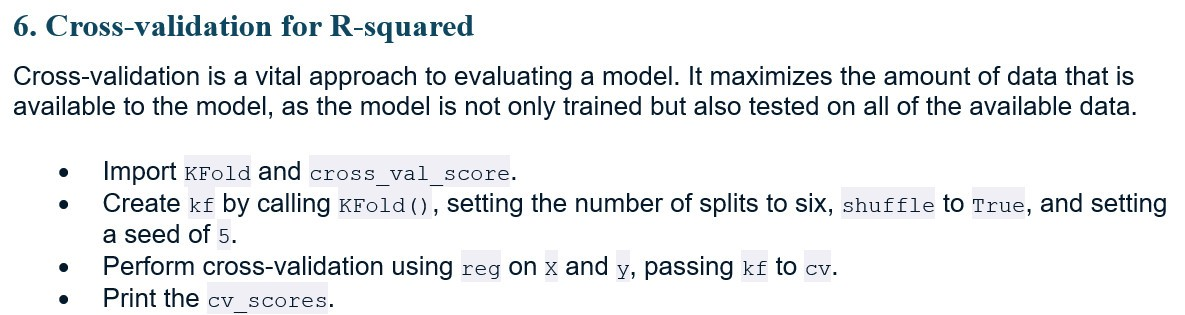

In [25]:
from sklearn.model_selection import KFold, cross_val_score
kf=KFold(n_splits=6,shuffle=True,random_state=5)
reg=LinearRegression()
cv_results=cross_val_score(reg,x,y,cv=kf)
print("Cross Validation Score: ", cv_results)

Cross Validation Score:  [0.99894062 0.99909245 0.9990103  0.99896344 0.99889153 0.99903953]


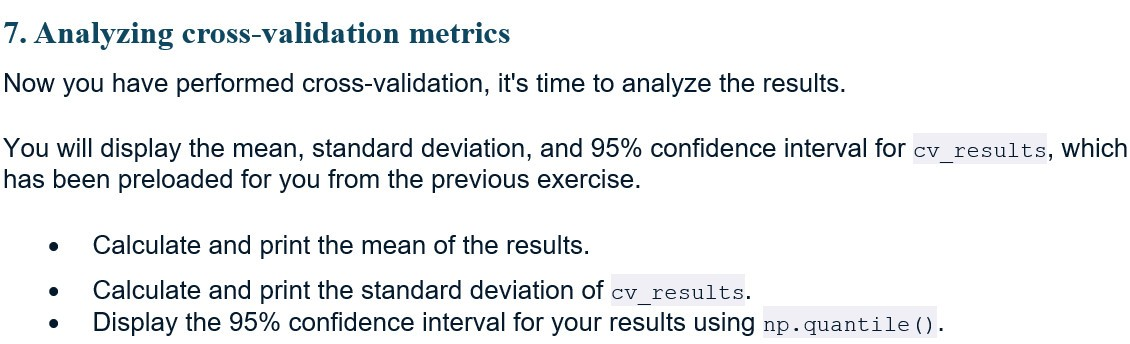

In [26]:
# Trung bình của cv_results
mean_cv_scores = np.mean(cv_results)
print('mean of cv_scores: ', mean_cv_scores)

#  Do lech chuan của cv_results
std_cv_scores = np.std(cv_results)
print('standard deviation of cv_scores:',std_cv_scores)

# do tin cay 95%
confidene_interval = np.quantile(cv_results, [0.025, 0.975])
print('95% confidence interval:', confidene_interval)

mean of cv_scores:  0.9989896443678249
standard deviation of cv_scores: 6.608118371529651e-05
95% confidence interval: [0.99889767 0.99908583]


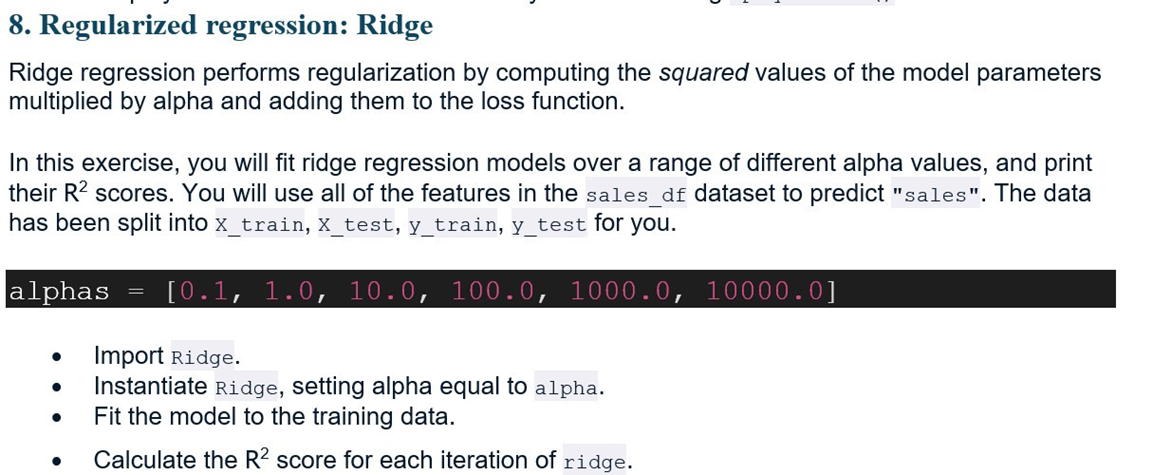

In [27]:
from sklearn.linear_model import Ridge
from sklearn.metrics import r2_score

In [28]:

#Define alphas
alphas = [0.1, 1.0, 10.0, 100.0, 1000.0, 10000.0]
#Interate over alphas
for alpha in alphas:
    #Khởi tạo và điều chỉnh mô hình hồi quy Ridge
    model = Ridge(alpha=alpha)
    model.fit(x_train, y_train)
    #Dự đoán doanh số bán hàng bằng test features
    y_pred = model.predict(x_test)
    #Tính R-squared score
    r2 = r2_score(y_test, y_pred)
    print('Alpha:', alpha)
    print('R-squared:', r2)

Alpha: 0.1
R-squared: 0.9989693601946971
Alpha: 1.0
R-squared: 0.9989693601946972
Alpha: 10.0
R-squared: 0.9989693601946984
Alpha: 100.0
R-squared: 0.9989693601947103
Alpha: 1000.0
R-squared: 0.998969360194829
Alpha: 10000.0
R-squared: 0.9989693601960165


In [29]:
from sklearn.linear_model import Lasso

model = Lasso(alpha=0.3)
# Dòng này huấn luyện mô hình Lasso trên dữ liệu huấn luyện x_train và nhãn tương ứng y_train. Điều này có nghĩa là mô hình sẽ được điều chỉnh để phù hợp với dữ liệu huấn luyện của bạn.
model.fit(x_train, y_train)
lasso_coef = model.coef_
print(lasso_coef)

plt.bar(name, lasso_coef)
plt.xticks(rotation=45)
plt.show()

[ 3.56254186 -0.0053686   0.02452649]


NameError: name 'name' is not defined

In [ ]:
from sklearn.linear_model import Lasso


[ 3.56254186 -0.0053686   0.02452649]


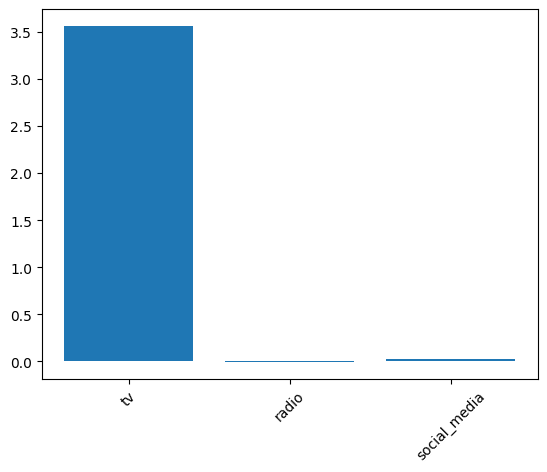

In [30]:


# Instantite a Lasso regressor with an alpha of 0.3
lasso = Lasso(alpha=0.3)

# Dòng này huấn luyện mô hình Lasso trên dữ liệu huấn luyện x_train và nhãn tương ứng y_train. Điều này có nghĩa là mô hình sẽ được điều chỉnh để phù hợp với dữ liệu huấn luyện của bạn.lasso.fit(x_train, y_train)

# Compute the model's coefficients, doing lasso_coef
lasso_coef = lasso.coef_
print(lasso_coef)

name = sales_df.drop(["sales","influencer"], axis=1).columns
plt.bar(name, lasso_coef)
plt.xticks(rotation=45)
plt.show()